In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
from sklearn.metrics import plot_confusion_matrix
from tqdm.notebook import tqdm
from math import ceil, floor
import requests

from PIL import Image
import random

import os

from sewar import mse, rmse, psnr, ssim, uqi, msssim, ergas, scc, rase, sam, vifp

In [3]:
# img = mpimg.imread('./stinkbug.png')
# img = mpimg.imread('./flight.jpg')
# print(img.shape)
# imgplot = plt.imshow(img)

In [4]:
def download(url, fname=None):
    if fname is None:
        fname = url.split('/')[-1]
    r = requests.get(url, stream=True)
    total_size_in_bytes= int(r.headers.get('content-length', 0))
    block_size = 1024 #1 Kibibyte

    if os.path.exists(fname):
        if total_size_in_bytes == os.path.getsize(fname):
            print("'{}' of same size already exists.".format(fname))
        else:
            print("'{}' already exists. Size differs.".format(fname))
        return
    print("Downloading: {} \t Bytes: {}".format(fname, total_size_in_bytes))
    progress_bar = tqdm(total=total_size_in_bytes, unit='iB', unit_scale=True)
    with open(fname, 'wb') as file:
        for data in r.iter_content(block_size):
            progress_bar.update(len(data))
            file.write(data)
    progress_bar.close()
    if total_size_in_bytes != 0 and progress_bar.n != total_size_in_bytes:
        print("ERROR, something went wrong")

In [8]:
file_url_train = "https://pjreddie.com/media/files/mnist_train.csv"
file_url_test = "https://pjreddie.com/media/files/mnist_test.csv"
download(file_url_train)
download(file_url_test)

'mnist_train.csv' of same size already exists.
'mnist_test.csv' of same size already exists.


In [10]:
mnist_train = pd.read_csv("./mnist_train.csv")

In [11]:
mnist_train.head()

,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
mnist_train = mnist_train.iloc[:1000]

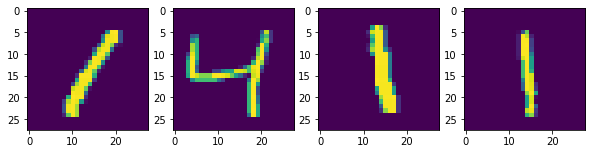

In [30]:
nmbr_index = [2,1,5,7]

fig, axs = plt.subplots(figsize=(10,10),nrows=1,ncols=len(nmbr_index))
for i,j in enumerate(nmbr_index):
    axs[i].imshow(np.array(mnist_train.iloc[j][1:]).reshape((28,28)))
plt.show()

In [37]:
functions = [mse, rmse, psnr, ssim, uqi, msssim, ergas, scc, rase, sam, vifp]

def df_simfunmatrix(func, df, indices):
    simfunc_matrix = np.zeros((len(nmbr_index),len(nmbr_index)))
    for i,ii in enumerate(indices):
        for j,jj in enumerate(indices):
            simfunc_matrix[i,j] = func(np.array(df.iloc[ii][1:]).reshape((28,28)), np.array(df.iloc[jj][1:]).reshape((28,28)))
    return simfunc_matrix


In [40]:
df_simfunmatrix(mse, mnist_train, nmbr_index)

array([[   0.        , 8435.12244898, 7070.00127551, 5908.05739796],
       [8435.12244898,    0.        , 8563.44005102, 7308.38137755],
       [7070.00127551, 8563.44005102,    0.        , 1718.85204082],
       [5908.05739796, 7308.38137755, 1718.85204082,    0.        ]])

In [46]:
mnist_train.iloc[nmbr_index]['5']

2    1
1    4
5    1
7    1
Name: 5, dtype: int64

In [19]:
nmbr_imgs = mnist_train.shape[0]

In [26]:
ds_train = np.array([np.array(mnist_train.iloc[i][1:]).reshape((28,28)) for i in range(nmbr_imgs)])

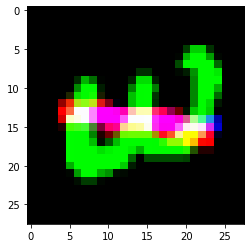

In [27]:
plt.imshow(ds_train[5:8].T)

In [28]:
# similarity = []
# for i in range(nmbr_imgs):
#     similarity[i] = ds_train[]

In [29]:
similarity = 0
for i in range(ds_train.shape[1]):
    for j in range(ds_train.shape[2]):
        similarity += np.abs(ds_train[6,i,j] - ds_train[8,i,j])
        
print(similarity/255)

130.64705882352942


In [30]:
xy = [[(x,y) for x in range(nmbr_imgs)] for y in range(nmbr_imgs)]

In [31]:
similarity_matrix = np.zeros((nmbr_imgs, nmbr_imgs))
for x in range(nmbr_imgs):
    for y in range(nmbr_imgs):
        for i in range(ds_train.shape[1]):
            for j in range(ds_train.shape[2]):
                similarity_matrix[x,y] += np.abs(ds_train[x,i,j] - ds_train[y,i,j])

KeyboardInterrupt: 

In [ ]:
from joblib import Parallel, delayed
import math

def sumall(x, y):
    sim = 0
    for i in range(ds_train.shape[1]):
            for j in range(ds_train.shape[2]):
                sim += np.abs(ds_train[x,i,j] - ds_train[y,i,j])
    return sim

simmat = Parallel(n_jobs=10)(delayed(sumall)(x, y) for x in range(nmbr_imgs) for y in range(nmbr_imgs))

In [ ]:
sm = np.array(simmat)
sm = sm/sm.max()
sm = sm.reshape((nmbr_imgs, nmbr_imgs))

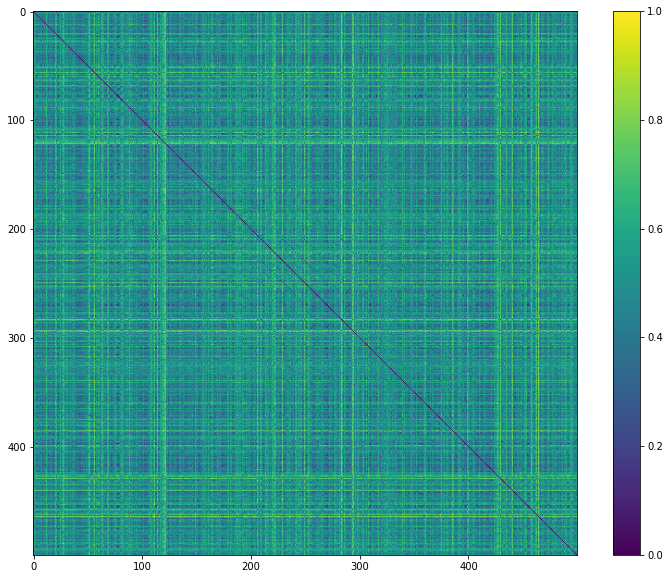

In [ ]:
plt.figure(figsize=(13,10))
im = plt.imshow(sm)
plt.colorbar(im)
plt.show()

In [ ]:
unique = np.unique(sm.flatten(), )[:10]
unique

array([0.        , 0.03763584, 0.03901181, 0.04290517, 0.04607927,
       0.05100461, 0.05136424, 0.05147369, 0.05402236, 0.0548667 ])

In [ ]:
print(np.where(sm == unique[5])[0])

[ 72 366]


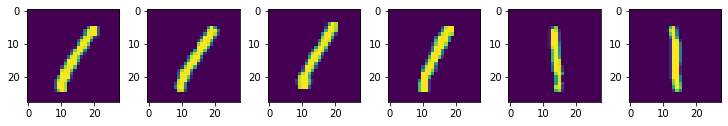

In [ ]:
fig, axs = plt.subplots(1, 6, constrained_layout=True, figsize=(10, 4))

axs[0].imshow(ds_train[3])
axs[1].imshow(ds_train[23])
axs[2].imshow(ds_train[59])
axs[3].imshow(ds_train[77])
axs[4].imshow(ds_train[8])
axs[5].imshow(ds_train[14])
plt.show()

In [ ]:
l = [77]
size = 300
for i in range(size):
    sim_sorted = np.sort(sm[l[i]])
    next_sim = 1
    while True:
        next_smallest = np.where(sm[l[i]] == sim_sorted[next_sim])[0][0]
        if next_smallest not in l:
            l.append(next_smallest)
            break
        else:
            next_sim += 1
        
    
    
# sm[3,22], sm[3,23], sm[3,24]
if size <= 20:
    fig, axs = plt.subplots(1, size, constrained_layout=True, figsize=(13, 4))
    for i in range(size):
        axs[i].imshow(ds_train[l[i]], 'Greys')
    plt.show()

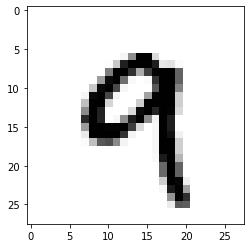

In [ ]:
for i in range(size):
    plt.imshow(ds_train[l[i]], 'Greys')
    plt.savefig('{}.png'.format(i))
    
    
    
# with imageio.get_writer('mygif.gif', mode='I') as writer:
#     for filename in ['{}.png'.format(i) for i in range(size)]:
#         image = imageio.imread(filename)
#         writer.append_data(image)
        
        
import glob

from PIL import Image


def make_gif(frame_folder):
    frames = [Image.open(image) for image in ["{}/{}.png".format(frame_folder, i) for i in range(size)]]
    frame_one = frames[0]
    frame_one.save("my.gif", format="GIF", append_images=frames,
               save_all=True, duration=100, loop=0)
    

if __name__ == "__main__":
    make_gif(".")

In [ ]:
l = [3]
# np.where(sm[l[0]] == np.sort(sm[l[0]]))
np.sort(sm[l[0]])[1], np.where(sm[l[0]] == np.sort(sm[l[0]])[1])[0][0]

(0.04290516769603628, 23)

In [ ]:
im = plt.imshow(similarity_matrix/similarity_matrix.max())
plt.colorbar(im)
plt.show()

In [ ]:
size = nmbr_imgs
data = similarity_matrix/similarity_matrix.max()

# Limits for the extent
x_start = 0
x_end = size
y_start = 0
y_end = size

extent = [x_start, x_end, y_start, y_end]

# The normal figure
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
im = ax.imshow(data, extent=extent, origin='lower', interpolation='None', cmap='viridis')

# Add the text
jump_x = (x_end - x_start) / (2.0 * size)
jump_y = (y_end - y_start) / (2.0 * size)
x_positions = np.linspace(start=x_start, stop=x_end, num=size, endpoint=False)
y_positions = np.linspace(start=y_start, stop=y_end, num=size, endpoint=False)

for y_index, y in enumerate(y_positions):
    for x_index, x in enumerate(x_positions):
        label = data[y_index, x_index]
        text_x = x + jump_x
        text_y = y + jump_y
        ax.text(text_x, text_y, label, color='black', ha='center', va='center')

fig.colorbar(im)
plt.show()

In [ ]:
def foo(tm):
    for i in range(tm.shape[0]):
        for j in range(tm.shape[1]):
            tm[i,j] += i*j
            
tmat = np.zeros((5,5))
print(tmat)
foo(tmat)
print(tmat)